<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_svd.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab: SVD

Demonstrate and visualize the the singular value decomposition of a data matrix, its covariance and its principal components.

Data are generated from a simple statistical model (two random normal distributions). The distributions are used to assign colors in the visualizations, but are not part of the analysis.

Goal: Develop an intuition for how SVD (an unsupervised technique) can be used for classification. This is a precursor to understanding the use of SVD for topic modeling with Latent Semantic Analysis (LSA).

# Generate a dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
from matplotlib import colors

In [ ]:
n_samples = 300 # initial value: 300

# will be added to one class, subtracted from the other
mean = np.array([5, -8]) # initial value: [5, -8]

def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n = n_samples
    dim = 2  # Initial value 2
    np.random.seed(0)
    C = np.array([[1, -3], [5, 5]]) # Initial value: [[1, -3], [5, 5]]
    #C = np.array([[1,0], [0,1]])  # Scales by the identity (i.e., no scaling)
    X = np.r_[np.dot(np.random.randn(n, dim), C) - mean,
              np.dot(np.random.randn(n, dim), C.T) + mean]
    y = np.hstack((np.zeros(n, np.int8), np.ones(n, np.int8)))
    return X, y


X, y = dataset_cov()

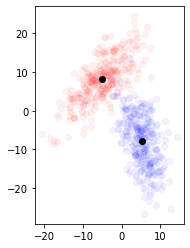

In [ ]:
# Plot the data
fig, axes = plt.subplots()
axes.set_aspect(1)

mu = np.mean(X, axis=0)
for k, color in zip(np.unique(y), ['red', 'blue']):
  Xk = X[y == k, :]
  plt.scatter(Xk[:,0], Xk[:,1], c=color, alpha=.05)

  # Add the class means
  mu_k = np.mean(Xk, axis=0)
  Xp = Xk - mu_k
  plt.plot(mu_k[0], mu_k[1], 'ok')

# SVD

Any n-by-m matrix $\mathbf{X}$ has a singular value decomposition (SVD):

$$
\mathbf{X} = \mathbf{U S V}^T
$$

where $\mathbf{U}$ is n-by-n, $\mathbf{V}$ is m-by-m, and
$\mathbf{S}$ is an n-by-m [diagonal matrix](https://en.wikipedia.org/wiki/Diagonal_matrix) of singular values. Both $\mathbf{U}$ and $\mathbf{V}$ are orthonormal, meaning:
$$
\mathbf{U} \mathbf{U}^T = \mathbf{I}
$$
and
$$
\mathbf{V} \mathbf{V}^T = \mathbf{I}
$$
where $\mathbf{I}$ is an identity matrix of appropriate dimension. The orthonormal property is extremely important for a variety of reasons. For example, you can 

In [ ]:
# Calculate the SVD of X
U, s, V = svd(X, full_matrices=False)


# Covariance matrix

The covariance of $\mathbf{X}$ is the matrix product:

$$
\mathbf{\Sigma} = \frac{1}{n} \mathbf{X}^T \mathbf{X}
$$

In [ ]:
np.set_printoptions(precision=2)

cov_mat = np.cov(X.T)
print('the first way:\n', cov_mat)

cov_mat1 = np.matmul(X.T, X) / X.shape[0]
print('the second way:\n', cov_mat1)

the first way:
 [[ 44.53 -35.6 ]
 [-35.6  103.95]]
the second way:
 [[ 44.46 -35.54]
 [-35.54 103.79]]



# Covariance matrix II

Substitute the SVD of $\mathbf{X}$ to get

$$
\mathbf{\Sigma} 
= \frac{1}{n} \left( \mathbf{USV}^T \right)^T \mathbf{USV}^T
= \frac{1}{n} \mathbf{V S}^2 \mathbf{V}^T
$$

Use the symbol $\mathbf{\Lambda}$ to represent the m-by-m diagonal matrix:

$$
\mathbf{\Lambda} = \frac{1}{n}\mathbf{S}^2
$$ 

Then

$$
\mathbf{\Sigma} 
= \mathbf{V} \mathbf{\Lambda V}^T
$$


In [ ]:
assert V.shape == (2,2)
assert s.shape == (2,)

# Create the entire diagonal matrix S
S = np.array([[s[0], 0], [0, s[1]]])
S = np.matmul(S, S) / X.shape[0]
assert S.shape == (2,2)

SVT = np.matmul(S, V.T)
cov_mat2 = np.matmul(V, SVT)
print('covariance matrix from the SVD:\n', cov_mat2)

covariance matrix from the SVD:
 [[ 44.46 -35.54]
 [-35.54 103.79]]


# Principal components

The columns $\mathbf{v}_i$ of $\mathbf{V}$
and the diagonal elements $\lambda_i$ of $\mathbf{\Lambda}$ are the eigenvectors and eigenvalues, respectively, of $\mathbf{\Sigma}$. You can see this by right-multiplying by $\mathbf{V}$

$$
\mathbf{\Sigma V} 
= \mathbf{V \Lambda}
$$

When you write the equation for each column $\mathbf{v}_i$, you get the standard [eigenvalue-eigenvector](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) relation:

$$
\mathbf{\Sigma v}_i 
= \lambda_i \mathbf{v}_i
$$

Since $\mathbf{\Sigma}$ is the covariance matrix of $\mathbf{X}$, the vectors $\mathbf{v}_i$ are the principal components of the data $\mathbf{X}$. 



If we project $\mathbf{X}$ onto $\mathbf{V}$, then we get a transformed version $\mathbf{D'} $ of the data.

$$
\mathbf{D}' = \mathbf{D V}
$$

This is a linear combination of the columns of $\mathbf{U}$ weighted by the singular values (diagonal elements) of $\mathbf{S}$

$$
\mathbf{D}' = \mathbf{U S}
$$

In vector form:

$$
\mathbf{d}'_k = \sum_{i} \mathbf{u}_{k,i} s_i
$$

where $\mathbf{d}'_k$ is row $k$ of $\mathbf{D}'$

The covariance of $\mathbf{D}'$ is diagonal
$$
\frac{1}{m} \mathbf{D'}^T \mathbf{ D'}
= \mathbf{\Lambda}
$$

That is, the columns of $\mathbf{D'}$ are uncorrelated with one another.

# PCA demo

Compare this section with cells 7-13 of Raschka's ch05.ipynb.

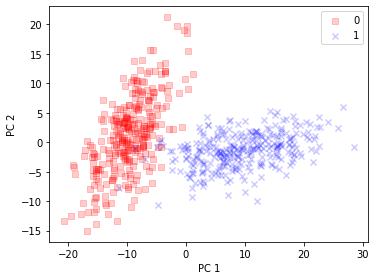

In [ ]:
# Compute the covariance matrix of X
cov_mat = np.cov(X.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Make sure eigenvalues (and associated eigenvectors) are decreasing order
v = eigen_vecs
if eigen_vals[1] > eigen_vals[0]:
  eigen_vals = eigen_vals[[1,0]]
  v = eigen_vecs[:,[1,0]]

# Project the data onto the eigenvectors (compute the principal components)
X_pca = X.dot(v)
markers = ['s', 'x']

for k, c, m in zip(np.unique(y), ['red', 'blue'], markers):
    cov = np.cov(X[y==k,:].T)
    plt.scatter(X_pca[y == k, 0], 
                X_pca[y == k, 1], 
                c=c, label=k, marker=m, alpha=.2)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout();
plt.gca().set_aspect('equal')

# Data and eigenvectors

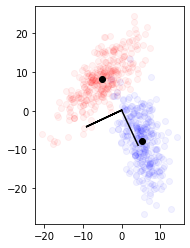

In [ ]:
# Compute the mean (centroid) and covariance by hand (with broadcasting)
fig, axes = plt.subplots()
axes.set_aspect(1)

# Plot the data
mu = np.mean(X, axis=0)
for k, color in zip(np.unique(y), ['red', 'blue']):
  Xk = X[y == k, :]
  plt.scatter(Xk[:,0], Xk[:,1], c=color, alpha=.05)

  # Add the class means
  mu_k = np.mean(Xk, axis=0)
  Xp = Xk - mu_k
  plt.plot(mu_k[0], mu_k[1], 'ok')

# Plot the eigenvectors (there are 2)
for k in range(2):
  xs = (2 - k) * [mu[0], mu[0] + 10*eigen_vecs[0, k]]
  ys = (2 - k) * [mu[1], mu[1] + 10*eigen_vecs[1, k]]
  plt.plot(xs, ys, 'k')